# Lab 8 Task 3 - CNN on any dataset and compare with ANN

### SAHIL AMRITKAR
### 20BRS1180  


In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))
test_labels

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]
(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [3]:
image_size=28
no_of_classes=10
n_epochs=10

In [4]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [5]:
#CNN Model
model = tf.keras.models.Sequential([
    
    # The first convolution
    tf.keras.layers.Conv2D(212, (3,3), activation='relu', input_shape=(image_size, image_size, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # x output neurons for x classes with the softmax activation
    tf.keras.layers.Dense(no_of_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-02-16 12:40:44.586927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-16 12:40:44.587360: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [19]:
history=model.fit(train_images, train_labels, epochs=n_epochs, batch_size=100)

Epoch 1/10


2023-02-16 12:20:02.438619: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 16s 25ms/step - loss: 0.4270 - acc: 0.9191
Epoch 2/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0743 - acc: 0.9779
Epoch 3/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0532 - acc: 0.9844
Epoch 4/10
600/600 [==============================] - 15s 26ms/step - loss: 0.0425 - acc: 0.9873
Epoch 5/10
600/600 [==============================] - 15s 26ms/step - loss: 0.0367 - acc: 0.9894
Epoch 6/10
600/600 [==============================] - 16s 26ms/step - loss: 0.0308 - acc: 0.9913
Epoch 7/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0253 - acc: 0.9929
Epoch 8/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0238 - acc: 0.9937
Epoch 9/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0213 - acc: 0.9944
Epoch 10/10
600/600 [==============================] - 15s 25ms/step - loss: 0.0182 - acc: 0.9950


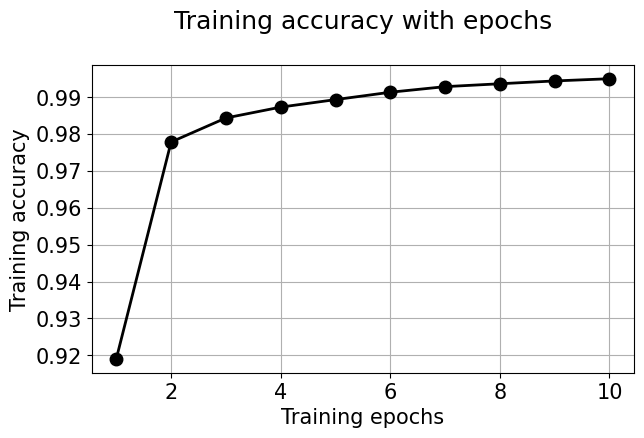

In [21]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(1)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

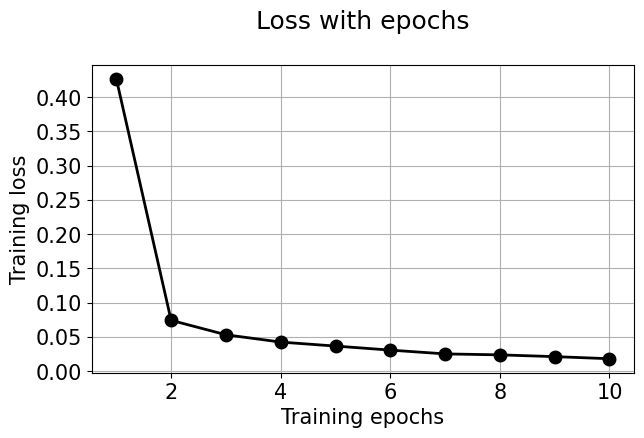

In [22]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(1)
plt.title("Loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:
#ANN Model
from keras import models
from keras import layers

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_ann=network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
  1/469 [..............................] - ETA: 2:14 - loss: 2.3028 - accuracy: 0.1172

2023-02-16 12:42:10.964999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 13ms/step - loss: 1.4657 - accuracy: 0.6653
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.5803 - accuracy: 0.8530
Epoch 3/10
469/469 [==============================] - 6s 13ms/step - loss: 0.4080 - accuracy: 0.8889
Epoch 4/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3508 - accuracy: 0.9011
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.3211 - accuracy: 0.9082
Epoch 6/10
469/469 [==============================] - 6s 13ms/step - loss: 0.3014 - accuracy: 0.9134
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2859 - accuracy: 0.9173
Epoch 8/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2733 - accuracy: 0.9206
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.2612 - accuracy: 0.9247
Epoch 10/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2499 - accuracy: 0.9269


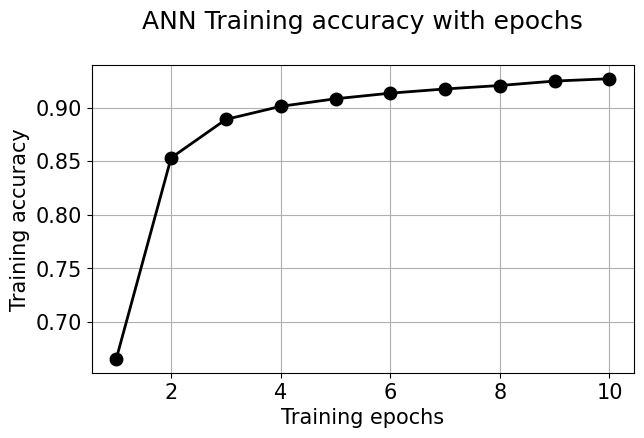

In [10]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history_ann.history['accuracy'],'-o',c='k',lw=2,markersize=9)
plt.grid(1)
plt.title("ANN Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

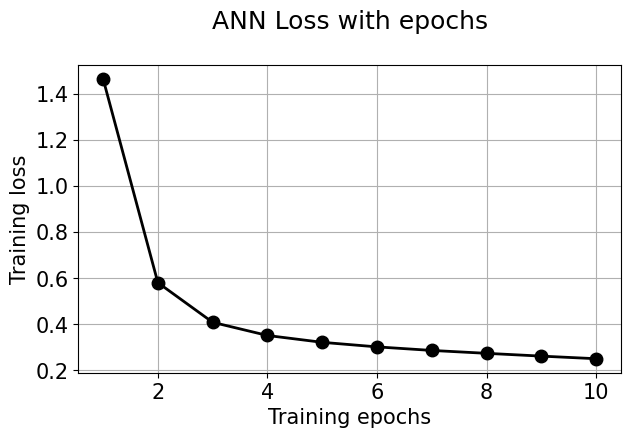

In [11]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history_ann.history['loss'],'-o',c='k',lw=2,markersize=9)
plt.grid(1)
plt.title("ANN Loss with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training loss",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

CNN acheives higher training accuracy and acheives it quicker